In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.core import Activation
from keras import backend as k
from keras import regularizers

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('./Kannada-MNIST/train.csv')

In [6]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.008817,0.029467,0.037767,0.075933,...,0.015583,0.016450,0.013417,0.022300,0.012217,0.001383,0.003783,0.0,0.002717,0.0
std,2.872305,0.0,0.0,0.0,0.0,0.0,1.474271,2.700491,2.726371,3.993023,...,1.443852,1.958914,1.342572,2.051846,1.730959,0.338846,0.926724,0.0,0.665445,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,157.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0


In [116]:
y = df.label
x = df.drop('label',axis=1)

In [117]:
def plt_grp(df_loc):
    single_value = np.array(df_loc).reshape(28,28)
    plt.imshow(single_value,cmap=plt.cm.binary)

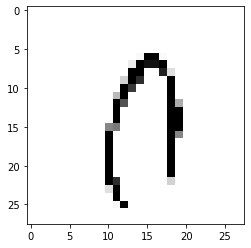

In [118]:
plt_grp(x.iloc[1])

In [153]:
x = x.values.reshape(60000,28,28)    #df to value and reshape into 3dim
y = y.values     #

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [157]:
x_train.shape

(48000, 28, 28)

In [159]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(Dense(18,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [160]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 18)                1170      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                190       
Total params: 51,600
Trainable params: 51,600
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [162]:
model.fit(x_train,y_train,epochs=5, batch_size=10)

Epoch 1/5
48000/48000 [==============================] - 9s 189us/step - loss: 1.6958 - accuracy: 0.4405
Epoch 2/5
48000/48000 [==============================] - 8s 160us/step - loss: 1.0799 - accuracy: 0.6625
Epoch 3/5
48000/48000 [==============================] - 7s 156us/step - loss: 0.9127 - accuracy: 0.7222
Epoch 4/5
48000/48000 [==============================] - 7s 152us/step - loss: 0.8176 - accuracy: 0.7916
Epoch 5/5
48000/48000 [==============================] - 7s 152us/step - loss: 0.7619 - accuracy: 0.8074


In [163]:
model.evaluate(x_test, y_test)

12000/12000 [==============================] - 1s 75us/step


[0.9968203781048457, 0.8267499804496765]

In [164]:
print(model.metrics_names)

['loss', 'accuracy']


In [172]:
prediction = model.predict(x_test)

In [173]:
prediction

array([[3.5593849e-01, 7.5935037e-03, 5.7673355e-04, ..., 6.2518306e-02,
        1.4481486e-02, 1.0782956e-02],
       [3.5593849e-01, 7.5935037e-03, 5.7673355e-04, ..., 6.2518306e-02,
        1.4481486e-02, 1.0782956e-02],
       [5.6299875e-08, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.5593849e-01, 7.5935037e-03, 5.7673355e-04, ..., 6.2518306e-02,
        1.4481486e-02, 1.0782956e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.6149019e-31]], dtype=float32)

In [175]:
print(np.argmax(prediction[110]))

4


In [176]:
y_test[110]

4

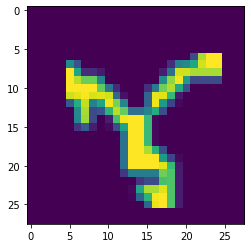

In [177]:
plt.imshow(x_test[110])

In [178]:
test_df = pd.read_csv('./Kannada-MNIST/test.csv')

In [179]:
test_df

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
test_df.shape
new_test_df = test_df.drop('id',axis=1)

In [188]:
test_np = new_test_df.values.reshape(5000,28,28)

In [189]:
test_np.shape

(5000, 28, 28)

In [190]:
test_prediction = model.predict(test_np)

In [234]:
result = []
for i in test_prediction:
    result.append(np.argmax(i))

In [242]:
d = pd.DataFrame(data={"label": result})
#d = pd.DataFrame(data={"res": result,"id":list(range(5000))},index='i')
#d.to_csv("./file.csv", sep=',',index=False)

In [243]:
d.index.name = 'id'

In [244]:
d.to_csv('out.csv')